In [205]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import imageio

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,20)

In [206]:
hf_higgs= h5py.File('higgs_100000_pt_250_500.h5', 'r')
hf_qcd = h5py.File('qcd_100000_pt_250_500.h5', 'r')

with h5py.File('qcd_100000_pt_250_500.h5', "r") as f:
    # List all groups
    for key in f.keys():
        print(key)

with h5py.File('higgs_100000_pt_250_500.h5', "r") as f:
    # List all groups
    for key in f.keys():
        print(key)

qcd_100000_pt_250_500
higgs_100000_pt_250_500


In [207]:
higgs_data = np.array(hf_higgs.get('higgs_100000_pt_250_500'))
qcd_background_data = np.array(hf_qcd.get('qcd_100000_pt_250_500'))
higgs_data

array([[ 4.72074292e+02,  1.37051933e-01, -2.53514528e+00, ...,
         3.83473901e-01,  6.16674158e-01,  5.57406805e-01],
       [ 4.70405678e+02, -3.91569464e-02,  6.96687614e-02, ...,
         3.13239811e-01,  8.25308189e-01,  7.04650207e-01],
       [ 4.38008357e+02, -1.81138694e-01, -3.03108291e+00, ...,
         4.39916683e-01,  4.96338176e-01,  4.87496134e-01],
       ...,
       [ 4.66920808e+02, -8.05493156e-01, -7.54702707e-01, ...,
         6.57692767e-01,  6.96196368e-01,  1.80727311e-02],
       [ 4.71611853e+02,  8.01812583e-01, -3.07788313e+00, ...,
         4.19343355e-01,  8.60960496e-01,  6.41891786e-01],
       [ 4.67029906e+02, -4.32315077e-01,  2.48393869e+00, ...,
         5.58198696e-01,  8.95642894e-01,  8.55158017e-01]])

In [208]:
higgs_data_1 = pd.DataFrame(data=higgs_data, index=None, columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'])
qcd_background_data_1 = pd.DataFrame(data=qcd_background_data, index=None, columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'])

#for i in range(0,14):
#    higgs_data_1.iloc[:,i] = higgs_data[:,i]
#    qcd_background_data_1.iloc[:,i] = qcd_background_data[:,i]

higgs_data = higgs_data_1
qcd_background_data = qcd_background_data_1

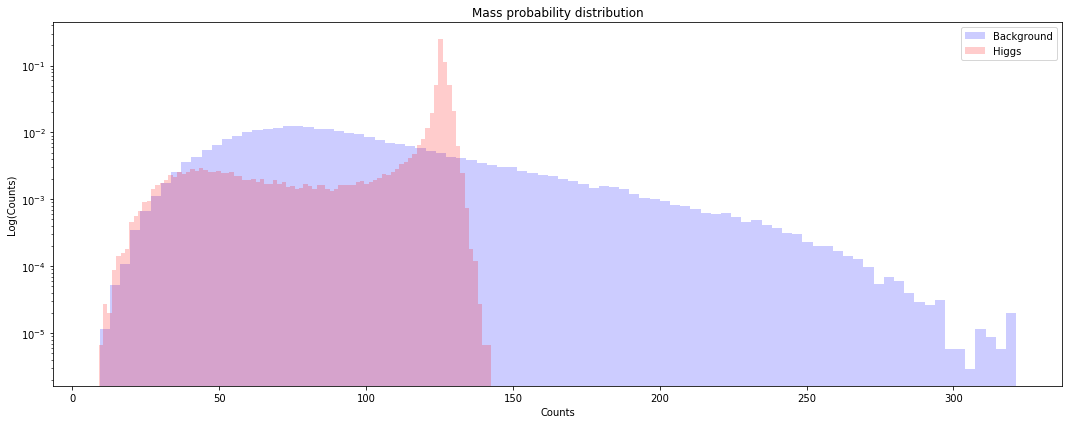

In [209]:
bins = 90; alph = .2 
fig, (ax) = plt.subplots(1, 1, figsize = (15, 6))
ax.hist(qcd_background_data['mass'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data['mass'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.set_yscale('log')
ax.set_title('Mass probability distribution') 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(Counts)')
ax.legend()
fig.tight_layout()

Without even cutting the data, in a given window of collecting daya there exists a background that should be measured around 900 times. Within the same window there exist 80 actual higgs boson signal measurements. Now, I will create a poisson distribution with an average rate of 900, and determine the signficance of measuring 80 signal particles given the average rate

The probability that a signal will be falsely recorded as a background: 1.0
Sigma value for the above percentage is: -inf


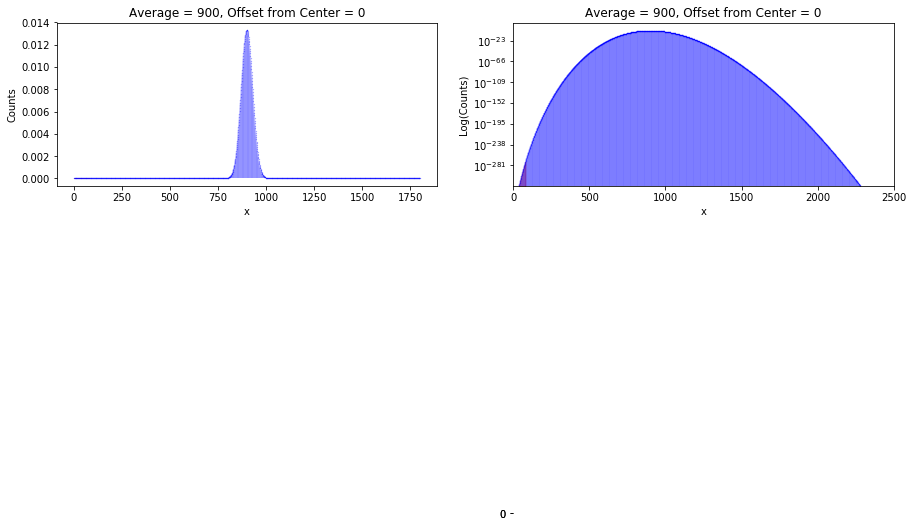

In [210]:
mu = 900; sigma = 0; siz = 100000
distro = stats.poisson.rvs(mu, sigma, size = siz)
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(15,3))
                          
ax.set_title(f'Average = {mu}, Offset from Center = {sigma}') 
x = np.linspace(0, 2*mu, 2*mu+1)
ax.plot(x,stats.poisson.pmf(x,mu,sigma), 'b.', ms=.5, alpha = .5)
ax.vlines(x, 0, stats.poisson.pmf(x, mu, sigma), colors='b', lw=.2, alpha=0.5)
measured = np.linspace(0, 80, 81)
ax.fill_between(measured, stats.poisson.pmf(measured, mu, sigma), color = 'r', linewidth = 1, alpha = .4)
ax.set_xlabel('x')
ax.set_ylabel('Counts')

ax1.set_title(f'Average = {mu}, Offset from Center = {sigma}') 
x1 = np.linspace(0, 3*mu, 3*mu+1)
ax1.plot(x1, stats.poisson.pmf(x1,mu,sigma), 'b.', ms=.5, alpha = .5)
ax1.vlines(x1, 0, stats.poisson.pmf(x1, mu, sigma), colors='b', lw=.2, alpha=0.5)
measured1 = np.linspace(0, 80, 81)
ax1.fill_between(measured1, stats.poisson.pmf(measured1, mu, sigma), color = 'r', linewidth = 1, alpha = .4)
ax1.set_xlabel('x')
ax1.set_xlim(0,2500)
ax1.set_ylabel('Log(Counts)')
ax1.set_yscale('log')

prob = 1 - stats.poisson.cdf(80, mu, sigma)
z = (stats.norm.ppf(1-(prob)))

print(f'The probability that a signal will be falsely recorded as a background: {prob}')
print(f'Sigma value for the above percentage is: {z}')

This is actual quite impressive with what are results are. The detection here is so small that my computer does not even recoginize that there higgs data that was statistically different from my background data. Thus, we really need to shave some background data to increase the sensitivity of the detection of the higgs data. In order for this to change, we would need to cut the background distribution to around 15 from 800 to get a 5$\sigma$ detection. By taking more and more cuts, we are able to remove more and more background to increase the sensitivity of the higgs measurement

In [230]:
qcd_background_mass_cut = qcd_background_data.query(f' 0 < mass < 160')
higgs_data_mass_cut = higgs_data.query(f' 0 < mass < 160')
background_cut = len(qcd_background_mass_cut)/len(qcd_background_data)
higgs_cut = len(higgs_data_mass_cut)/len(higgs_data)
print(f' Percent cut from background data: {(1 - background_cut)*100:.4f}%')
print(f' Percent cut from higgs data: {(1 - higgs_cut)*100:.4f}%')

 Percent cut from background data: 9.6730%
 Percent cut from higgs data: 0.0000%


The probability that a signal will be falsely recorded as a background: 1.0
Sigma value for the above percentage is: -inf


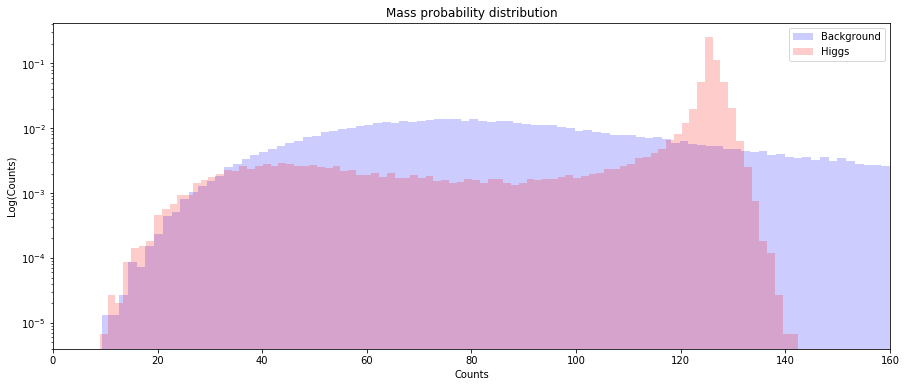

In [231]:
bins = 90; alph = .2; sigma=0
fig, (ax) = plt.subplots(1, 1, figsize = (15, 6))
ax.hist(qcd_background_mass_cut['mass'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data_mass_cut['mass'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.set_yscale('log')
ax.set_title('Mass probability distribution') 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(Counts)')
ax.legend()
ax.set_xlim(0,160)

prob = 1 - stats.poisson.cdf(80*higgs_cut, 900*background_cut, sigma)
z = (stats.norm.ppf(1-(prob)))
print(f'The probability that a signal will be falsely recorded as a background: {prob}')
print(f'Sigma value for the above percentage is: {z}')

In [232]:
qcd_background_mass_cut = qcd_background_data.query(f' 100 < mass < 130')
higgs_data_mass_cut = higgs_data.query(f' 100 < mass < 130')
background_cut = len(qcd_background_mass_cut)/len(qcd_background_data)
higgs_cut = len(higgs_data_mass_cut)/len(higgs_data)
print(f' Percent cut from background data: {(1 - background_cut)*100:.4f}%')
print(f' Percent cut from higgs data: {(1 - higgs_cut)*100:.4f}%')

 Percent cut from background data: 81.1020%
 Percent cut from higgs data: 17.2710%


The probability that a signal will be falsely recorded as a background: 1.0
Sigma value for the above percentage is: -inf


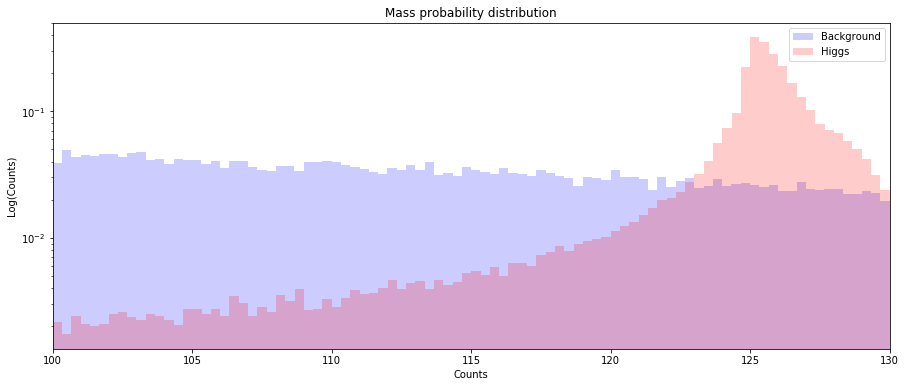

In [233]:
bins = 90; alph = .2; sigma=0
fig, (ax) = plt.subplots(1, 1, figsize = (15, 6))
ax.hist(qcd_background_mass_cut['mass'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data_mass_cut['mass'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.set_yscale('log')
ax.set_title('Mass probability distribution') 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(Counts)')
ax.legend()
ax.set_xlim(100,130)

prob = 1 - stats.poisson.cdf(80*higgs_cut, 900*background_cut, sigma)
z = (stats.norm.ppf(1-(prob)))
print(f'The probability that a signal will be falsely recorded as a background: {prob}')
print(f'Sigma value for the above percentage is: {z}')

In [234]:
qcd_background_mass_cut = qcd_background_data.query(f' 120 < mass < 140')
higgs_data_mass_cut = higgs_data.query(f' 120 < mass < 140')
background_cut = len(qcd_background_mass_cut)/len(qcd_background_data)
higgs_cut = len(higgs_data_mass_cut)/len(higgs_data)
print(f' Percent cut from background data: {(1 - background_cut)*100:.4f}%')
print(f' Percent cut from higgs data: {(1 - higgs_cut)*100:.4f}%')

 Percent cut from background data: 91.2100%
 Percent cut from higgs data: 21.9370%


The probability that a signal will be falsely recorded as a background: 0.9726
Sigma value for the above percentage is: -1.9198


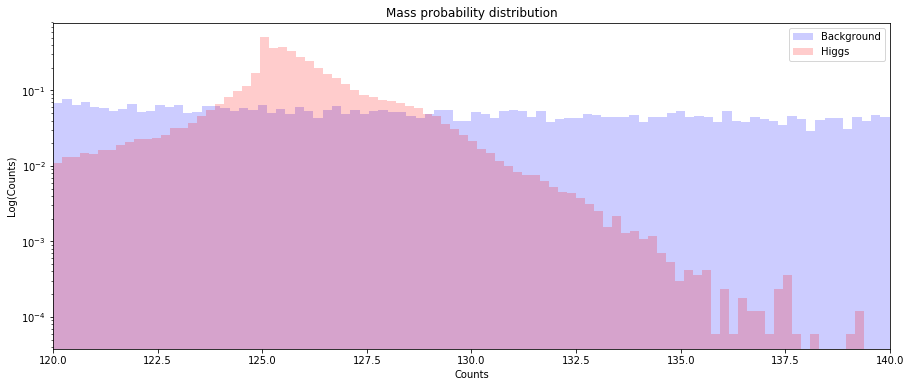

In [235]:
bins = 90; alph = .2; sigma=0
fig, (ax) = plt.subplots(1, 1, figsize = (15, 6))
ax.hist(qcd_background_mass_cut['mass'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data_mass_cut['mass'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.set_yscale('log')
ax.set_title('Mass probability distribution') 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(Counts)')
ax.legend()
ax.set_xlim(120,140)

prob = 1 - stats.poisson.cdf(80*higgs_cut, 900*background_cut, sigma)
z = (stats.norm.ppf(1-(prob)))
print(f'The probability that a signal will be falsely recorded as a background: {prob:.4f}')
print(f'Sigma value for the above percentage is: {z:.4f}')

I finally was able to get a sigma value, but it neesd to be a positive number. The reason being is that I will see significantly more higgs particles than expected background particles 

In [236]:
qcd_background_mass_cut = qcd_background_data.query(f' 120 < mass < 132')
higgs_data_mass_cut = higgs_data.query(f' 120 < mass < 132')
background_cut = len(qcd_background_mass_cut)/len(qcd_background_data)
higgs_cut = len(higgs_data_mass_cut)/len(higgs_data)
print(f' Percent cut from background data: {(1 - background_cut)*100:.4f}%')
print(f' Percent cut from higgs data: {(1 - higgs_cut)*100:.4f}%')

 Percent cut from background data: 94.2340%
 Percent cut from higgs data: 22.4900%


The probability that a signal will be falsely recorded as a background: 0.0737
Sigma value for the above percentage is: 1.4484


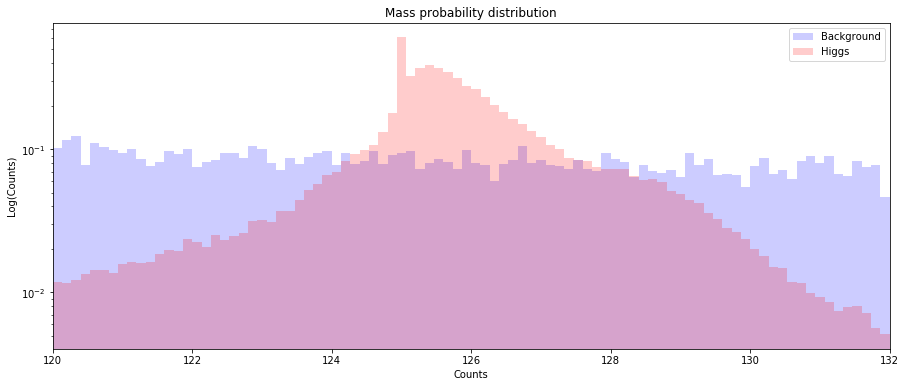

In [237]:
bins = 90; alph = .2; sigma=0
fig, (ax) = plt.subplots(1, 1, figsize = (15, 6))
ax.hist(qcd_background_mass_cut['mass'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data_mass_cut['mass'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.set_yscale('log')
ax.set_title('Mass probability distribution') 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(Counts)')
ax.legend()
ax.set_xlim(120,132)

prob = 1 - stats.poisson.cdf(80*higgs_cut, 900*background_cut, sigma)
z = (stats.norm.ppf(1-(prob)))
print(f'The probability that a signal will be falsely recorded as a background: {prob:.4f}')
print(f'Sigma value for the above percentage is: {z:.4f}')

Dang, this looks pretty good. I was able to cut out about 22% of my signal data and remove close to 94% of my background data in order to get a positive sigma value. In order to get to 5$\sigma$ I need to narrow down this even more

In [238]:
qcd_background_mass_cut = qcd_background_data.query(f' 122 < mass < 130')
higgs_data_mass_cut = higgs_data.query(f' 122 < mass < 130')
background_cut = len(qcd_background_mass_cut)/len(qcd_background_data)
higgs_cut = len(higgs_data_mass_cut)/len(higgs_data)
print(f' Percent cut from background data: {(1 - background_cut)*100:.4f}%')
print(f' Percent cut from higgs data: {(1 - higgs_cut)*100:.4f}%')

 Percent cut from background data: 96.2200%
 Percent cut from higgs data: 26.6130%


The probability that a signal will be falsely recorded as a background: 0.0001
Sigma value for the above percentage is: 3.8290


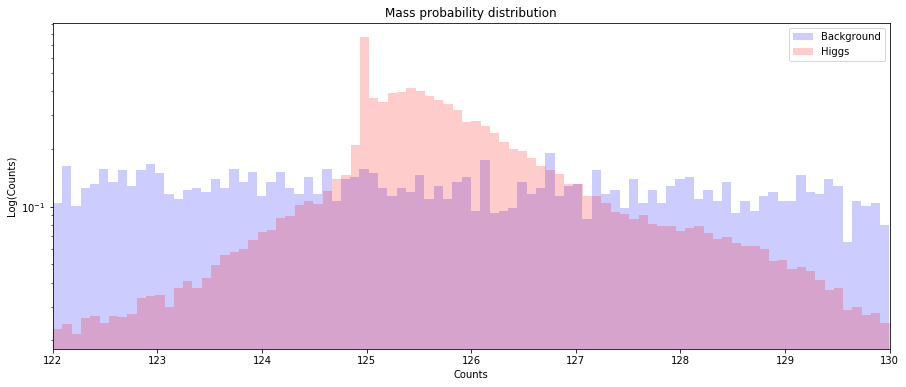

In [239]:
bins = 90; alph = .2; sigma=0
fig, (ax) = plt.subplots(1, 1, figsize = (15, 6))
ax.hist(qcd_background_mass_cut['mass'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data_mass_cut['mass'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.set_yscale('log')
ax.set_title('Mass probability distribution') 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(Counts)')
ax.legend()
ax.set_xlim(122,130)

prob = 1 - stats.poisson.cdf(80*higgs_cut, 900*background_cut, sigma)
z = (stats.norm.ppf(1-(prob)))
print(f'The probability that a signal will be falsely recorded as a background: {prob:.4f}')
print(f'Sigma value for the above percentage is: {z:.4f}')

In [240]:
qcd_background_mass_cut = qcd_background_data.query(f' 123 < mass < 129')
higgs_data_mass_cut = higgs_data.query(f' 123 < mass < 129')
background_cut = len(qcd_background_mass_cut)/len(qcd_background_data)
higgs_cut = len(higgs_data_mass_cut)/len(higgs_data)
print(f' Percent cut from background data: {(1 - background_cut)*100:.4f}%')
print(f' Percent cut from higgs data: {(1 - higgs_cut)*100:.4f}%')

 Percent cut from background data: 97.1560%
 Percent cut from higgs data: 31.2500%


The probability that a signal will be falsely recorded as a background: 0.0000
Sigma value for the above percentage is: 5.1374


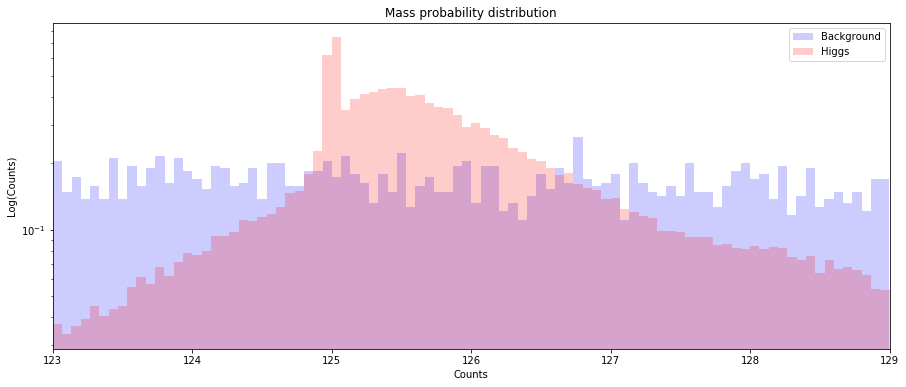

In [241]:
bins = 90; alph = .2; sigma=0
fig, (ax) = plt.subplots(1, 1, figsize = (15, 6))
ax.hist(qcd_background_mass_cut['mass'], bins, alpha = alph, density = True, color='b', label='Background')
ax.hist(higgs_data_mass_cut['mass'], bins, alpha = alph, density = True, color='r', label='Higgs')
ax.set_yscale('log')
ax.set_title('Mass probability distribution') 
ax.set_xlabel('Counts')
ax.set_ylabel('Log(Counts)')
ax.legend()
ax.set_xlim(123,129)

prob = 1 - stats.poisson.cdf(80*higgs_cut, 900*background_cut, sigma)
z = (stats.norm.ppf(1-(prob)))
print(f'The probability that a signal will be falsely recorded as a background: {prob:.4f}')
print(f'Sigma value for the above percentage is: {z:.4f}')

Wow, this is pretty good. I was able to cut out only 31% of the higgs data and 97% of the background data in order to provide a significance of close to 5.14$\sigma$ for the simulated higgs data

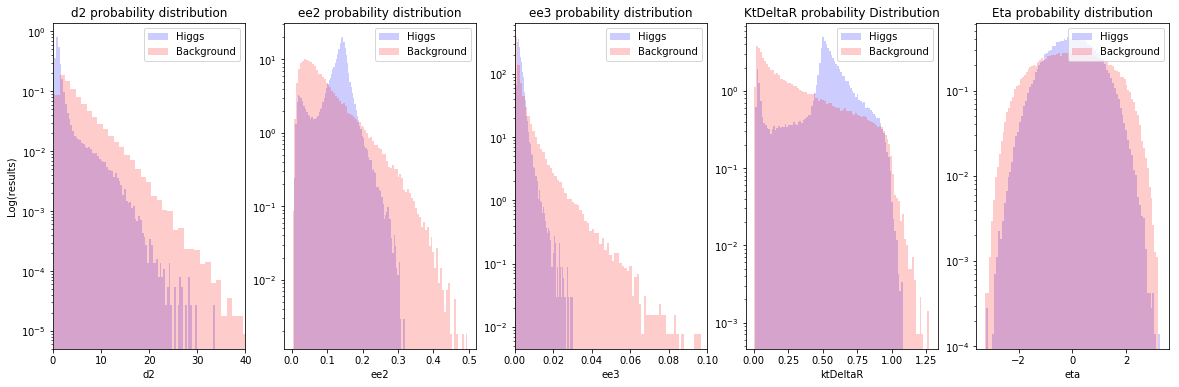

In [242]:
bins = 90; alph = .2
fig, (ax, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize = (20, 6))
ax.hist(higgs_data['d2'], bins, alpha = alph, density = True, color='b', label='Higgs')
ax.hist(qcd_background_data['d2'], bins, alpha = alph, density = True, color='r', label='Background')
ax.set_yscale('log')
ax.set_title('d2 probability distribution'); 
ax.set_xlabel('d2')
ax.set_ylabel('Log(results)')
ax.set_xlim([0,40])
ax.legend()

ax1.hist(higgs_data['ee2'], bins, alpha = alph, density = True, color='b', label='Higgs' )
ax1.hist(qcd_background_data['ee2'], bins, alpha = alph, density = True, color='r', label='Background')
ax1.set_yscale('log')
ax1.set_title('ee2 probability distribution')
ax1.set_xlabel('ee2')
ax1.legend()

ax2.hist(higgs_data['ee3'], bins, alpha = alph, density = True, color='b', label='Higgs')
ax2.hist(qcd_background_data['ee3'], bins, alpha = alph, density = True, color='r', label='Background')
ax2.set_yscale('log')
ax2.set_title('ee3 probability distribution')
ax2.set_xlabel('ee3')
ax2.set_xlim([0,.1])
ax2.legend()


ax3.hist(higgs_data['KtDeltaR'], bins, alpha = alph, density = True, color='b', label='Higgs')
ax3.hist(qcd_background_data['KtDeltaR'], bins, alpha = alph, density = True, color='r', label='Background')
ax3.set_yscale('log')
ax3.set_title('KtDeltaR probability Distribution')
ax3.set_xlabel('ktDeltaR')
ax3.legend()

ax4.hist(higgs_data['eta'], bins, alpha = alph, density = True, color='b', label='Higgs')
ax4.hist(qcd_background_data['eta'], bins, alpha = alph, density = True, color='r', label='Background')
ax4.set_yscale('log')
ax4.set_title('Eta probability distribution'); 
ax4.set_xlabel('eta')
ax4.legend()

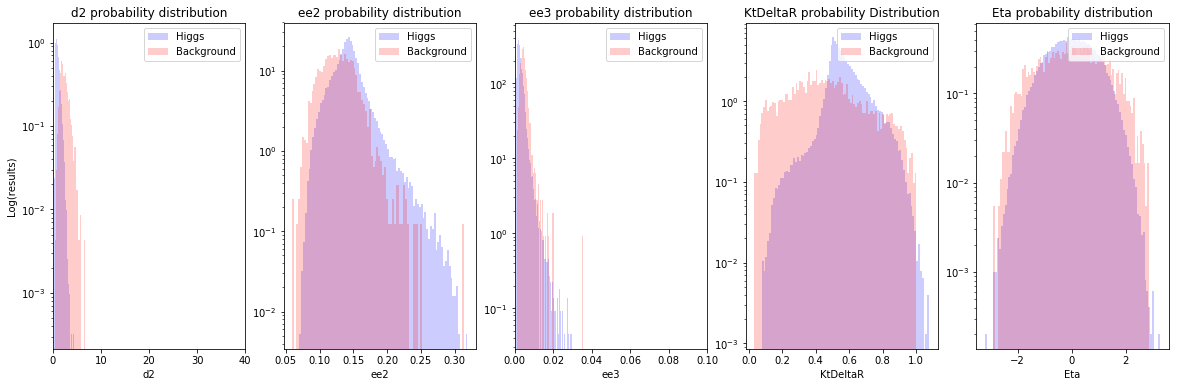

In [243]:
bins = 90; alph = .2
fig, (ax, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize = (20, 6))
ax.hist(higgs_data_mass_cut['d2'], bins, alpha = alph, density = True, color='b', label='Higgs')
ax.hist(qcd_background_mass_cut['d2'], bins, alpha = alph, density = True, color='r', label='Background')
ax.set_yscale('log')
ax.set_title('d2 probability distribution'); 
ax.set_xlabel('d2')
ax.set_ylabel('Log(results)')
ax.set_xlim([0,40])
ax.legend()

ax1.hist(higgs_data_mass_cut['ee2'], bins, alpha = alph, density = True, color='b', label='Higgs' )
ax1.hist(qcd_background_mass_cut['ee2'], bins, alpha = alph, density = True, color='r', label='Background')
ax1.set_yscale('log')
ax1.set_title('ee2 probability distribution')
ax1.set_xlabel('ee2')
ax1.legend()

ax2.hist(higgs_data_mass_cut['ee3'], bins, alpha = alph, density = True, color='b', label='Higgs')
ax2.hist(qcd_background_mass_cut['ee3'], bins, alpha = alph, density = True, color='r', label='Background')
ax2.set_yscale('log')
ax2.set_title('ee3 probability distribution')
ax2.set_xlabel('ee3')
ax2.set_xlim([0,.1])
ax2.legend()


ax3.hist(higgs_data_mass_cut['KtDeltaR'], bins, alpha = alph, density = True, color='b', label='Higgs')
ax3.hist(qcd_background_mass_cut['KtDeltaR'], bins, alpha = alph, density = True, color='r', label='Background')
ax3.set_yscale('log')
ax3.set_title('KtDeltaR probability Distribution')
ax3.set_xlabel('KtDeltaR')
ax3.legend()

ax4.hist(higgs_data_mass_cut['eta'], bins, alpha = alph, density = True, color='b', label='Higgs')
ax4.hist(qcd_background_mass_cut['eta'], bins, alpha = alph, density = True, color='r', label='Background')
ax4.set_yscale('log')
ax4.set_title('Eta probability distribution'); 
ax4.set_xlabel('Eta')
ax4.legend()